**Description of data**

The project focuses on an e-commerce logistics dataset where we aim to analyze and optimize delivery operations. This dataset contains detailed information about orders, such as product categories, shipping routes, logistics providers, costs, and delivery timelines. The goal is to understand delivery patterns, manage costs, and ensure timely deliveries. Accurate insights from this data will help improve customer satisfaction, enhance operational efficiency, and support strategic business decisions. This project can also pave the way for building predictive models to forecast delays or estimate logistics costs for future transactions.

**The datset contains the following fields:**

- order_id:Unique identifier for each order.
- product_category_cleaned:Cleaned category name of the product (e.g., PC, Laptop).
- destination_city:City where the order is to be delivered.
- destination_city_cleaned:Cleaned version of the destination city name.
- origin_city:City from where the order is dispatched.
- shipping_route:Description of the route taken for shipping.
- logistics_provider_id:Identifier for the logistics provider responsible for delivery.
- logistics_group_id:Identifier for the logistics group or network.
- route_type:Type of route taken (e.g., express, standard).
- final_delivery_status:Delivery status of the order (e.g., Delivered, Delayed).
- dispatch_date:Date the order was dispatched.
- actual_delivery_date:Actual date the order was delivered.
- promised_delivery_date:Date promised for delivery during the order process.
- transit_storage_cost:Cost incurred for storage during transit.
- shipping_cost:Cost incurred for shipping the order.
- total_logistic_cost:Combined logistics cost (e.g., shipping + storage).
- delivery_days:Total days taken for the delivery.
- source:Source platform or channel where the order was placed.
- session_length:Duration of the user session while placing the order.
- payment_mode:Mode of payment used (e.g., Credit Card, Debit Card).



In [2]:
#Step 1: Import the Liabraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the CSV file
df=pd.read_csv("Excel_Module_Ecommerce_demo (9) (1).csv")
#Step 2: Understand the Data
df.head()

,order_id,product_category_cleaned,destination_city,destination_city_cleaned,origin_city,shipping_route,logistics_provider_id,logistics_group_id,route_type,final_delivery_status,dispatch_date,actual_delivery_date,promised_delivery_date,transit_storage_cost,shipping_cost,total_logistic_cost,delivery_days,source,session_length,payment_mode
0,318813,PC,"Delhi, DL",Delhi,Bangalore,Bangalore-Delhi,Ship2Home delivery,Ship2Home,Outstation,Delivered,01-03-2019,04-03-2019,06-03-2019,26,129,155,3,Website,3259.850000,Credit Card
1,70870,Laptop,"Mumbai, MH",Mumbai,Bangalore,Bangalore-Mumbai,Ship2Home Logistics Unit,Ship2Home,Outstation,Delivered,01-03-2019,07-03-2019,06-03-2019,35,114,149,6,App,2173.741671,Debit Card
2,719174,Mobile,"Kolkata, WB",Kolkata,Delhi,Delhi-Kolkata,Ship2Home Logistics Unit,Ship2Home,Outstation,Delivered,01-03-2019,07-03-2019,04-03-2019,38,114,152,6,App,703.981372,Debit Card
3,482982,Mobile,"Delhi, DL",Delhi,Delhi,Delhi-Delhi,Ship2Home Logistics Unit,Ship2Home,Local,Delivered,01-03-2019,05-03-2019,06-03-2019,0,129,129,4,Website,1646.060000,Debit Card
4,217738,Laptop,"Kolkata, WB",Kolkata,Delhi,Delhi-Kolkata,Ship2Home Logistics Unit,Ship2Home,Outstation,Delivered,01-03-2019,07-03-2019,08-03-2019,50,109,159,6,App,2275.445909,Debit Card


In [4]:
# Check basic metadata
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4263 entries, 0 to 4262
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  4263 non-null   int64  
 1   product_category_cleaned  4263 non-null   object 
 2   destination_city          4263 non-null   object 
 3   destination_city_cleaned  4263 non-null   object 
 4   origin_city               4263 non-null   object 
 5   shipping_route            4263 non-null   object 
 6   logistics_provider_id     4263 non-null   object 
 7   logistics_group_id        4263 non-null   object 
 8   route_type                4263 non-null   object 
 9   final_delivery_status     4263 non-null   object 
 10  dispatch_date             4263 non-null   object 
 11  actual_delivery_date      4263 non-null   object 
 12  promised_delivery_date    4263 non-null   object 
 13  transit_storage_cost      4263 non-null   int64  
 14  shipping

In [5]:
# Summarize numeric columns
df.describe()

,order_id,transit_storage_cost,shipping_cost,total_logistic_cost,delivery_days,session_length
count,4263.000000,4263.000000,4263.000000,4263.000000,4263.000000,4252.000000
mean,486061.779498,36.379310,113.239268,149.618578,4.580812,1986.206951
std,290238.360554,25.199093,11.914642,20.672889,2.439792,1005.849827
min,111.000000,0.000000,85.000000,100.000000,0.000000,180.210000
25%,227592.500000,25.000000,106.000000,135.000000,3.000000,1124.000000
50%,484635.000000,37.000000,112.000000,153.000000,4.000000,1985.339563
75%,736178.000000,49.000000,124.000000,165.000000,6.000000,2858.417260
max,999468.000000,90.000000,130.000000,198.000000,11.000000,3877.982520


In [6]:
# Check for missing values
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])


source            11
session_length    11
payment_mode      11
dtype: int64

In [7]:
# Step 3: Clean the Data
# Handle missing values
df = df.dropna(subset=['session_length', 'transit_storage_cost'])  
df['transit_storage_cost'].fillna(df['transit_storage_cost'].mean())  


0       26
1       35
2       38
3        0
4       50
        ..
4258     0
4259     0
4260    78
4261    50
4262     0
Name: transit_storage_cost, Length: 4252, dtype: int64

In [8]:
# Remove duplicate rows
df = df.drop_duplicates()


In [9]:
# Correct data types
df['dispatch_date'] = pd.to_datetime(df['dispatch_date'], errors='coerce')
df['actual_delivery_date'] = pd.to_datetime(df['actual_delivery_date'], errors='coerce')
df['promised_delivery_date'] = pd.to_datetime(df['promised_delivery_date'], errors='coerce')



In [10]:
# Step 4: Transform the Data
# Normalize numeric columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['transit_storage_cost', 'session_length']] = scaler.fit_transform(df[['transit_storage_cost', 'session_length']])


In [11]:
# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)


In [12]:
# Step 5: Feature Engineering
# Create new features
df['delivery_delay'] = (df['actual_delivery_date'] - df['promised_delivery_date']).dt.days
df['dispatch_to_delivery_days'] = (df['actual_delivery_date'] - df['dispatch_date']).dt.days


In [13]:
# Perform feature selection 
correlation_matrix = df.corr()
display(correlation_matrix['delivery_delay'].sort_values(ascending=False))

delivery_delay                                    1.000000
dispatch_to_delivery_days                         0.832931
delivery_days                                     0.832529
actual_delivery_date                              0.629082
route_type_Outstation                             0.276484
total_logistic_cost                               0.223300
logistics_group_id_Ship2Home                      0.199056
transit_storage_cost                              0.165699
logistics_provider_id_Ship2Home  delivery         0.155647
destination_city_cleaned_Chennai                  0.095721
destination_city_Chennai, TN                      0.095721
payment_mode_Credit Card                          0.089743
shipping_route_Delhi-Chennai                      0.084749
shipping_route_Delhi-Bangalore                    0.084043
logistics_provider_id_Ship2Home Logistics Unit    0.066710
destination_city_cleaned_Mumbai                   0.062041
destination_city_Mumbai, MH                       0.0620

In [14]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for clustering
numeric_columns = ['transit_storage_cost', 'shipping_cost', 'delivery_days', 'session_length']
data = df[numeric_columns].dropna()  # Remove rows with missing values in these columns

# Standardize the data
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data)

print("Data standardized successfully!")


Data standardized successfully!


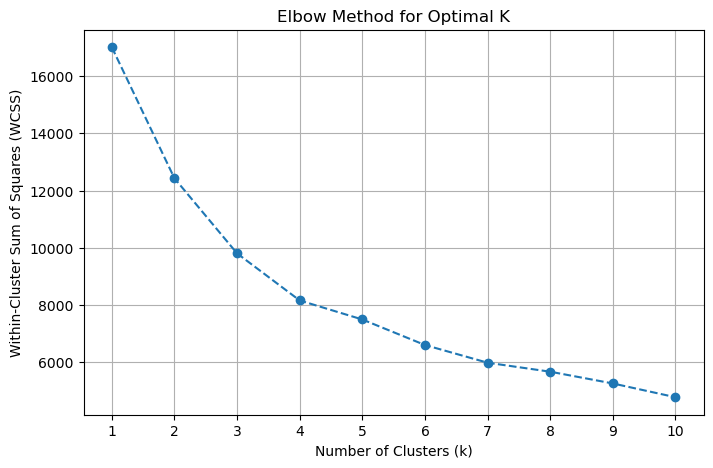

Elbow method graph plotted. Look for the 'elbow point' to determine the optimal k.


In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate WCSS for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(standardized_data)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

print("Elbow method graph plotted. Look for the 'elbow point' to determine the optimal k.")

In [16]:
# Run K-Means with the optimal number of clusters
optimal_k = 3  # Replace this with the value from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(standardized_data)

# Add cluster labels to the original dataset
data['Cluster'] = cluster_labels

# Display the first few rows with cluster labels
print("K-Means clustering completed!")
print(data.head())


K-Means clustering completed!
   transit_storage_cost  shipping_cost  delivery_days  session_length  Cluster
0              0.288889            129              3        0.832837        2
1              0.388889            114              6        0.539117        0
2              0.422222            114              6        0.141645        0
3              0.000000            129              4        0.396414        2
4              0.555556            109              6        0.566621        0


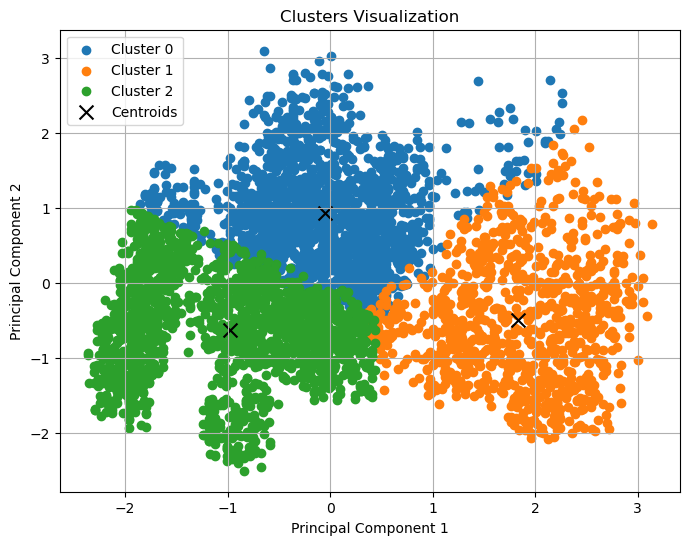

Clusters visualized successfully!


In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce data to 2 dimensions using PCA for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(standardized_data)

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
for cluster in range(optimal_k):  # Replace optimal_k with your number of clusters
    plt.scatter(
        reduced_data[cluster_labels == cluster, 0], 
        reduced_data[cluster_labels == cluster, 1], 
        label=f"Cluster {cluster}"
    )

# Plot centroids
centroids = kmeans.cluster_centers_
centroids_reduced = pca.transform(centroids)
plt.scatter(centroids_reduced[:, 0], centroids_reduced[:, 1], 
            c='black', marker='x', s=100, label='Centroids')

plt.title("Clusters Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

print("Clusters visualized successfully!")


In [18]:
# Add cluster labels to the original dataset
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = cluster_labels

# Display a sample of the dataset with cluster labels
print("Cluster labels added to the dataset.")
df_with_clusters.head()


Cluster labels added to the dataset.


,order_id,dispatch_date,actual_delivery_date,promised_delivery_date,transit_storage_cost,shipping_cost,total_logistic_cost,delivery_days,session_length,product_category_cleaned_Laptop,...,logistics_provider_id_Ship2Home delivery,logistics_provider_id_Ship2Home Logistics Unit,logistics_group_id_Ship2Home,route_type_Outstation,source_Website,payment_mode_Credit Card,payment_mode_Debit Card,delivery_delay,dispatch_to_delivery_days,Cluster
0,318813,2019-01-03,2019-04-03,2019-06-03,0.288889,129,155,3,0.832837,False,...,True,False,True,True,True,True,False,-61.0,90.0,2
1,70870,2019-01-03,2019-07-03,2019-06-03,0.388889,114,149,6,0.539117,True,...,False,True,True,True,False,False,True,30.0,181.0,0
2,719174,2019-01-03,2019-07-03,2019-04-03,0.422222,114,152,6,0.141645,False,...,False,True,True,True,False,False,True,91.0,181.0,0
3,482982,2019-01-03,2019-05-03,2019-06-03,0.000000,129,129,4,0.396414,False,...,False,True,True,False,True,False,True,-31.0,120.0,2
4,217738,2019-01-03,2019-07-03,2019-08-03,0.555556,109,159,6,0.566621,True,...,False,True,True,True,False,False,True,-31.0,181.0,0


In [19]:
# Calculate statistics for each cluster
cluster_summary = df_with_clusters.groupby('Cluster')[numeric_columns].agg(['mean', 'median', 'std'])

# Display the summary statistics for each cluster
print("Summary statistics for each cluster:")
print(cluster_summary)


Summary statistics for each cluster:
        transit_storage_cost                     shipping_cost         \
                        mean    median       std          mean median   
Cluster                                                                 
0                   0.409611  0.422222  0.137495    117.454377  117.5   
1                   0.787265  0.788889  0.114149     97.469280   95.0   
2                   0.184592  0.000000  0.204400    117.997628  121.0   

                  delivery_days                  session_length            \
              std          mean median       std           mean    median   
Cluster                                                                     
0        8.080949      6.717016    7.0  1.634587       0.517785  0.533913   
1        8.085906      4.223517    4.0  2.028910       0.489747  0.487776   
2        8.929596      2.728351    3.0  1.504412       0.459379  0.440257   

                   
              std  
Cluster            
0

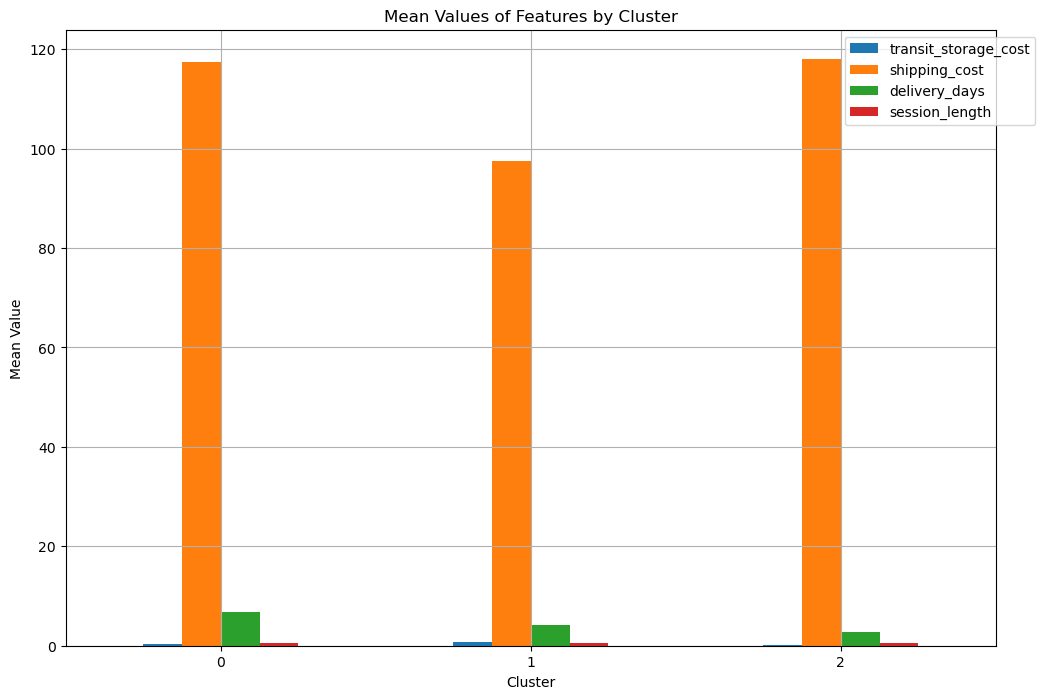

Customer segments profiled with visualizations.


In [20]:
import seaborn as sns

# Bar plot for mean values of numeric features by cluster
cluster_means = df_with_clusters.groupby('Cluster')[numeric_columns].mean().reset_index()

# Plotting
cluster_means.set_index('Cluster').plot(kind='bar', figsize=(12, 8))
plt.title("Mean Values of Features by Cluster")
plt.ylabel("Mean Value")
plt.xlabel("Cluster")
plt.xticks(rotation=0)
plt.legend(loc="best", bbox_to_anchor=(1.05, 1))
plt.grid()
plt.show()

print("Customer segments profiled with visualizations.")
